In [1]:
from ServiceNowData import ServiceNowHTTPXClient

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
client = ServiceNowHTTPXClient()
response = client.healthCheck()
response

Request: GET https://dev85509.service-now.com/api/now/table/incident?sysparm_query=ORDERBYDESCopened_at&sysparm_limit=1
Response: 200 GET https://dev85509.service-now.com/api/now/table/incident?sysparm_query=ORDERBYDESCopened_at&sysparm_limit=1


<Response [200 OK]>

In [3]:
response = client.getData('incident','', {
    'sysparm_display_value':True,
    'sysparm_exclude_reference_link':True,
    'sysparm_fields':'number,resolved_by,short_description,description,priority,impact,urgency,closed_by,close_notes,state,category'
    })

data = response.json()['result']
df = pd.DataFrame(data)
df.head(5)

Request: GET https://dev85509.service-now.com/api/now/table/incident?sysparm_query=&sysparm_display_value=true&sysparm_exclude_reference_link=true&sysparm_fields=number%2Cresolved_by%2Cshort_description%2Cdescription%2Cpriority%2Cimpact%2Curgency%2Cclosed_by%2Cclose_notes%2Cstate%2Ccategory
Response: 200 GET https://dev85509.service-now.com/api/now/table/incident?sysparm_query=&sysparm_display_value=true&sysparm_exclude_reference_link=true&sysparm_fields=number%2Cresolved_by%2Cshort_description%2Cdescription%2Cpriority%2Cimpact%2Curgency%2Cclosed_by%2Cclose_notes%2Cstate%2Ccategory


,number,short_description,resolved_by,urgency,impact,description,state,priority,category,close_notes,closed_by
0,INC0000060,Unable to connect to email,David Loo,2 - Medium,2 - Medium,I am unable to connect to the email server. It...,Closed,3 - Moderate,Inquiry / Help,This incident is resolved.,Joe Employee
1,INC0009002,My computer is not detecting the headphone device,System Administrator,2 - Medium,2 - Medium,My computer is not detecting the headphone dev...,Closed,3 - Moderate,Hardware,This is not an issue with the USB port. Replac...,System Administrator
2,INC0000009,Reset my password,System Administrator,1 - High,1 - High,I can't remember my password and need to log i...,Closed,1 - Critical,Inquiry / Help,Closed before close notes were made mandatory\...,Don Goodliffe
3,INC0000010,Need Oracle 10GR2 installed,System Administrator,3 - Low,2 - Medium,Currently running 10GR1 and need to upgrade to...,Closed,4 - Low,Database,Closed before close notes were made mandatory\...,Don Goodliffe
4,INC0000011,Need new Blackberry set up,System Administrator,2 - Medium,2 - Medium,I'm replacing my old phone with a Blackberry a...,Closed,3 - Moderate,Inquiry / Help,Closed before close notes were made mandatory\...,Don Goodliffe


In [4]:
priorityCountDF = df.groupby(['priority'])['priority'].count()
priorityCountDF.head()

priority
1 - Critical    27
2 - High         4
3 - Moderate    12
4 - Low          5
5 - Planning    19
Name: priority, dtype: int64

<Axes: ylabel='priority'>

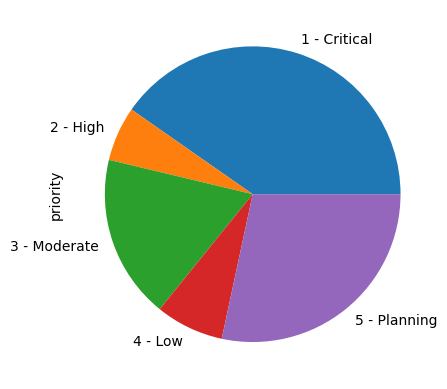

In [12]:
plt.figure()
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
priorityCountDF.plot(kind="pie")